# Project 1 Solutions

<b>(10 points) Simulating Future Values (FV) for Four Different Portfolios.</b>
    
<b>Today is January 1, 2020 and you have \\$1.0 million invested in your retirement portfolio. You are considering four investment strategies, each with a 20-year investment horizon.</b>

<b>(1) Buy-and-Hold Small-Cap US Stock Portfolio</b>: Allocate 100\% to small-cap US stocks and maintain this allocation for 20 years.

<b>(2) Buy-and-Hold Balanced Portfolio</b>: Allocate 80\% to large-cap US stocks and 20\% to short-term US government bonds today but allow the fractions to evolve over time based on the relative returns earned by the two asset classes. Because there is no rebalancing, the FV at the end of 20 years is the FV of a buy-and-hold portfolio that invests \\$800,000 in large-cap US stocks today plus the FV of a separate buy-and-hold portfolio that invests \\$200,000 in short-term US government debt today.

<b>(3) Rebalanced Balanced Portfolio</b>: Allocate 80\% to large-cap US stocks and 20\% to short-term US government bonds today. Reallocate 80\% to large-cap US stocks and 20\% to short-term US government bonds at the beginning of each calendar year. For example, if the portfolio grows from \\$1.0 million to $1.1 million over the first calendar year, the new allocations to stocks and bonds on January 1, 2021 become \\$880,00 and \\$220,000, respectively. As a result of rebalancing, the portfolio return each calendar year always will be equal to 80\% of the return on large-cap US stocks plus 20\% of the return on short-term US government debt.

<b>(4) Buy-and-Hold Leveraged Portfolio</b>: Allocate 200\% to small-cap US stocks and -100\% to short-term US government bonds. (We are imagining that you borrowed \\$1 million by issuing short-term US government debt, which then allowed you to invest \\$2 million in small-cap US stocks.) In general, the FV at the end of 20 years is the FV of a portfolio that invests \$2 million in small-cap US stocks <b>minus</b> the FV of a portfolio that invests \$1 million in short-term US government debt. The important caveat is that the combined portfolio value is not allowed to go negative before the end of the investment horizon. If the combined portfolio value does go negative, the FV for that 20-year investment horizon should be set to zero. This constraint requires that you track the value of each subportfolio each year.

<b>Please simulate the FV of each portfolio 100,001 times.</b>

Use <b>print("".format())</b> statements to create a table that reports the average FV, <b>standard deviation of FV</b>, minimum FV, 25th percentile FV, 50th percentile FV, 75th percentile FV, and maximum FV for each of the four strategies across four columns (one column per strategy). Round portfolio values to the nearest dollar and to print numbers with a fixed number of digits (e.g., using something like \{:10.0f\}). You are welcome to use the fact that there are 100,001 simulations to extract percentiles using hard-coded slices (e.g., fv1\[25000\] is the 25th percentile... after fv1 has been sorted).

Calculate and report the percentage of times that each portfolio results in a FV that is less than $1 million, using a format like \{:10.2f\}, so that the columns are aligned.

Calculate and report the percentage of times that each portfolio results in a FV that is less than $1, using a format like \{:10.2f\}, so that the columns are aligned.

Finally, calculate the expected utility associated with each of the four portfolios. For a given portfolio, you will calculate the natural logarithm of each FV (plus \\$100,000) and then calculate the average. Report expected utilities in the bottom row of your table using a format such as \{:10.2f\}, so that the columns are aligned.

- <b>Step #1</b>: Create empty lists 'fv1', 'fv2', 'fv3', and 'fv4'. These lists will contain the estimated FVs associated with each strategy. Of course, you may need to create several other lists along the way.

- <b>Step #2</b>: Simulate 20 years of returns from each of the three asset classes and then use those return series to simulate the future values associated with each of the four investment strategies. Simulate annual net returns for each asset class using the 'random.gauss(mean, sd)' where the mean annual returns and standard deviations of annual returns come from historical data provided by Ibbotson. (Although it is not terribly realistic, we are implicitly assuming that the returns earned by the three asset classes each year are independent.) Please replace any estimated return that is less than -100\% with -100\%.

<table border="0">
   <tr>
    <th>Investment</th>
    <th>Average Return</th>
    <th>Std Dev of Return</th>
   </tr>
   <tr>
    <td>Short-term US government bonds</td>
    <td>3.5%</td>
    <td>3.1%</td>
   </tr>
   <tr>
    <td>Large-cap US stocks</td>
    <td>10.1%</td>
    <td>20.2%</td>
   </tr>
   <tr>
    <td>Small-cap US stocks</td>
    <td>12.5%</td>
    <td>32.3%</td>
   </tr>
  </table>
  

- <b>Step #3</b>: Use the return series to calculate a single FV associated with each investment strategy. Append the future value associated with each investment strategy to the appropriate list. Please make sure that Steps #1, #2, and #3 work as intended before moving to the next step. It may be helpful to figure out how to calculate the FV for strategy (1) before moving on to strategy (2), etc. It may also be helpful to start with a 5-year investment horizon, so that you can verify your code is doing what it should be doing. (I provide a sample set of calculations for a random 5-year investment horizon in a companion Excel file.)

- <b>Step #4</b>: Once are successfully able to simulate the four FVs for a single 20-year investment horizon, embed this code in a for loop that allows you to simulate 100,001 FVs for each of the four investment strategies.

- <b>Step #5</b>: Process the contents of the four lists, 'fv1', 'fv2', 'fv3', and 'fv4', to generate the requested table of summary statistics. <b>To calculate the standard deviation, you will want to 'import statistics' and use 'statistics.stdev()'.</b>

- <b>Step #6</b>: Each student should write a sentence about which of these four portfolios they would choose to hold and why. Each sentence should be printed in a print statment of the form "Name, Username: <i>your sentence here</i>."

In [1]:
%matplotlib inline
import random
import math
import statistics
import matplotlib.pyplot as plt

years = 20
iterations = 100001

In [2]:
def ave(l):
    return sum(l)/len(l)

In [3]:
# Creates lists that will contain future values

fv1  = []
fv2  = []
fv3  = []
fv3a = []
fv4  = []

for num in range(iterations):

    # Generates 20 returns for each asset class

    sc = [random.gauss(0.125,0.323) for num in range(years)]
    lc = [random.gauss(0.101,0.202) for num in range(years)]
    bd = [random.gauss(0.035,0.031) for num in range(years)]

    # Replaces any returns that are less than -100% with -100%

    sc = [-1 if element < -1 else element for element in sc]
    lc = [-1 if element < -1 else element for element in lc]
    bd = [-1 if element < -1 else element for element in bd]

    # Generates 20 returns for balanced fund that rebalances

    bl = [(0.8)*lc[num] + (0.2)*bd[num] for num in range(years)]

    # Portfolio (1)

    FV_p1 = 1000000

    for num in range(years):
        FV_p1 = FV_p1 * (1 + sc[num])
    fv1.append(FV_p1)

    # Portfolio (2)

    FV_p2_lc = 800000
    FV_p2_bd = 200000
    for num in range(years):
        FV_p2_lc = FV_p2_lc * (1 + lc[num])
        FV_p2_bd = FV_p2_bd * (1 + bd[num])
    fv2.append(FV_p2_lc + FV_p2_bd)
    
    # Portfolio (3) - using weighted average monthly return

    FV_p3 = 1000000
    for num in range(years):
        FV_p3 = FV_p3 * (1 + bl[num])     # earlier solutions erroneously used 'bd[num]'
    fv3.append(FV_p3)

    # Portfolio (3) - rebalancing FV each year   
    
    FV_p3 = 1000000
    for num in range(years):
        FV_p3_Large = 0.8 * FV_p3 * (1 + lc[num])
        FV_p3_Bond  = 0.2 * FV_p3 * (1 + bd[num])
        FV_p3 = FV_p3_Large + FV_p3_Bond
    fv3a.append(FV_p3)
    
    # Portfolio (4)
    
    FV_p4_sc =  2000000
    FV_p4_bd = -1000000
    p4 = []

    for num in range(years):
        FV_p4_sc = FV_p4_sc * (1 + sc[num])
        FV_p4_bd = FV_p4_bd * (1 + bd[num])
        p4.append(FV_p4_sc + FV_p4_bd)

    if min(p4) > 0:
        fv4.append(p4[-1])
    else:
        fv4.append(0)

# Sorts FV so that I can extract percentiles

fv1  = sorted(fv1)
fv2  = sorted(fv2)
fv3  = sorted(fv3)
fv3a = sorted(fv3a)
fv4  = sorted(fv4)
            
# Creates list containing one when FV < 1 million and zero otherwise

fv1_1m  = [1 if element < 1000000 else 0 for element in fv1]
fv2_1m  = [1 if element < 1000000 else 0 for element in fv2]
fv3_1m  = [1 if element < 1000000 else 0 for element in fv3]
fv4_1m  = [1 if element < 1000000 else 0 for element in fv4]

# Creates list containing one when FV < 1 dollar and zero otherwise

fv1_1d = [1 if element < 1 else 0 for element in fv1]
fv2_1d = [1 if element < 1 else 0 for element in fv2]
fv3_1d = [1 if element < 1 else 0 for element in fv3]
fv4_1d = [1 if element < 1 else 0 for element in fv4]

# Creates list containing natural logs of FVs

ln_fv1 = [math.log(element+100000) for element in fv1]
ln_fv2 = [math.log(element+100000) for element in fv2]
ln_fv3 = [math.log(element+100000) for element in fv3]
ln_fv4 = [math.log(element+100000) for element in fv4]

In [4]:
# The two approaches to Portfolio (3) yield the same results... subject to some rounding
# ... which is why I exclude 'fv3a' from the calculations below
print(fv3[0:5])
print(fv3a[0:5])

[109712.36478844612, 130671.8428356998, 196752.62284621905, 219250.4041600019, 220867.00475461877]
[109712.36478844637, 130671.84283569992, 196752.6228462193, 219250.40416000213, 220867.00475461912]


In [5]:
print("                      SC Stock  --    B&H Bal  --  Rebalance  --  Leveraged\n")
print("Average FV       -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(ave(fv1),ave(fv2),ave(fv3),ave(fv4)))
print("Std. Dev. FV     -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(statistics.stdev(fv1),statistics.stdev(fv2),statistics.stdev(fv3),statistics.stdev(fv4)))
print("")
print("Minimum FV       -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(fv1[0],fv2[0],fv3[0],fv4[0]))
print("25th percentile  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(fv1[25000],fv2[25000],fv3[25000],fv4[25000]))
print("50th percentile  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(fv1[50000],fv2[50000],fv3[50000],fv4[50000]))
print("75th percentile  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(fv1[75000],fv2[75000],fv3[75000],fv4[75000]))
print("Maximum FV       -- {:10.0f}  -- {:10.0f}  -- {:10.0f}  -- {:10.0f}"
      .format(fv1[-1],fv2[-1],fv3[-1],fv4[-1]))
print("")
print("% < $1 million   -- {:10.2f}% -- {:10.2f}% -- {:10.2f}% -- {:10.2f}%"
      .format(100*ave(fv1_1m),100*ave(fv2_1m),100*ave(fv3_1m),100*ave(fv4_1m)))
print("% < $1 dollar    -- {:10.2f}% -- {:10.2f}% -- {:10.2f}% -- {:10.2f}%"
      .format(100*ave(fv1_1d),100*ave(fv2_1d),100*ave(fv3_1d),100*ave(fv4_1d)))
print("")
print("Expected Utility -- {:10.2f}  -- {:10.2f}  -- {:10.2f}  -- {:10.2f}"
      .format(ave(ln_fv1),ave(ln_fv2),ave(ln_fv3),ave(ln_fv4)))
print("Std. Dev. Ln FV  -- {:10.2f}  -- {:10.2f}  -- {:10.2f}  -- {:10.2f} (BONUS)"
      .format(statistics.stdev(ln_fv1),statistics.stdev(ln_fv2),statistics.stdev(ln_fv3),statistics.stdev(ln_fv4)))

                      SC Stock  --    B&H Bal  --  Rebalance  --  Leveraged

Average FV       --   10575350  --    5894761  --    5393336  --   18112938
Std. Dev. FV     --   20153388  --    5387388  --    4019692  --   40390365

Minimum FV       --          0  --     416734  --     109712  --          0
25th percentile  --    1551735  --    2573229  --    2716928  --          0
50th percentile  --    4361371  --    4319812  --    4337162  --    4740733
75th percentile  --   11279793  --    7349433  --    6853672  --   19391153
Maximum FV       --  738785916  --  128581742  --   71638776  -- 1475426722

% < $1 million   --      17.26% --       1.88% --       1.92% --      39.45%
% < $1 dollar    --       0.46% --       0.00% --       0.00% --      37.63%

Expected Utility --      15.27  --      15.33  --      15.30  --      14.58
Std. Dev. Ln FV  --       1.41  --       0.74  --       0.66  --       2.59 (BONUS)


# Bonus Plot #1 -- FV (\\$millions)

In [6]:
lower = int(iterations/100)
upper = iterations - int(iterations/100)

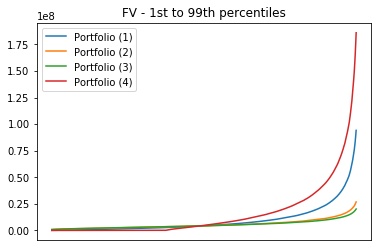

In [8]:
plt.plot(fv1[lower:upper], label = 'Portfolio (1)')
plt.plot(fv2[lower:upper], label = 'Portfolio (2)')
plt.plot(fv3[lower:upper], label = 'Portfolio (3)')
plt.plot(fv4[lower:upper], label = 'Portfolio (4)')
plt.title("FV - 1st to 99th percentiles")
plt.legend()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

# Bonus Plot #2 -- ln(FV)

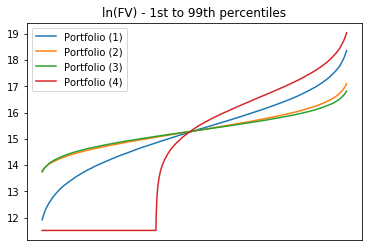

In [9]:
plt.plot(ln_fv1[lower:upper], label = 'Portfolio (1)')
plt.plot(ln_fv2[lower:upper], label = 'Portfolio (2)')
plt.plot(ln_fv3[lower:upper], label = 'Portfolio (3)')
plt.plot(ln_fv4[lower:upper], label = 'Portfolio (4)')
plt.title("ln(FV) - 1st to 99th percentiles")
plt.legend()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

# Bonus Plot #3 -- ln(FV)

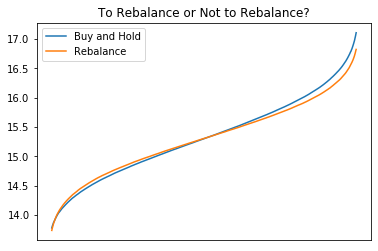

In [10]:
plt.plot(ln_fv2[lower:upper], label = 'Buy and Hold')
plt.plot(ln_fv3[lower:upper], label = 'Rebalance')
plt.title("To Rebalance or Not to Rebalance?")
plt.legend()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()